In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

## Reading in data 

In [11]:
df = pd.read_csv("resources/College_Data", index_col= "Unnamed: 0" )

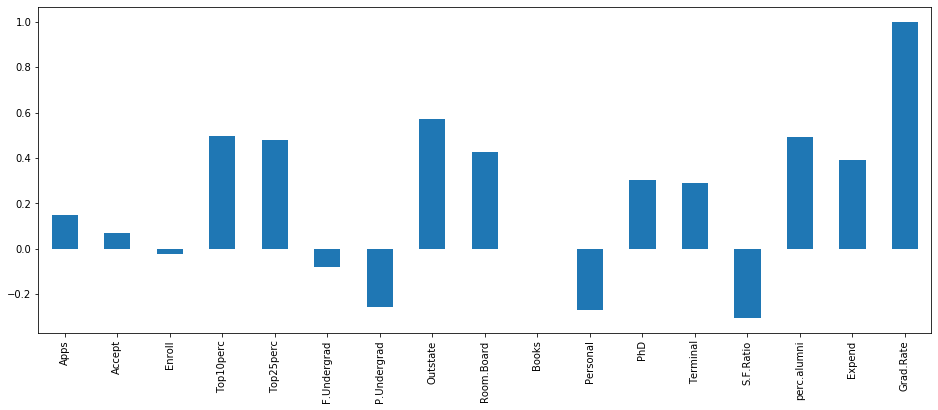

In [19]:
df.corr()["Grad.Rate"].plot(kind = "bar", figsize = (16,6))

In [21]:
df.isnull().sum()

Private        0
Apps           0
Accept         0
Enroll         0
Top10perc      0
Top25perc      0
F.Undergrad    0
P.Undergrad    0
Outstate       0
Room.Board     0
Books          0
Personal       0
PhD            0
Terminal       0
S.F.Ratio      0
perc.alumni    0
Expend         0
Grad.Rate      0
dtype: int64

## We are assuming that we do not know if the school is public or provate
- so for now lets drop this column

In [28]:
df_no_label = df.drop("Private", axis=1)

In [29]:
df_no_label

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Abilene Christian University,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Adelphi University,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
Adrian College,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
Agnes Scott College,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
Alaska Pacific University,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Worcester State College,2197,1515,543,4,26,3089,2029,6797,3900,500,1200,60,60,21.0,14,4469,40
Xavier University,1959,1805,695,24,47,2849,1107,11520,4960,600,1250,73,75,13.3,31,9189,83
Xavier University of Louisiana,2097,1915,695,34,61,2793,166,6900,4200,617,781,67,75,14.4,20,8323,49
Yale University,10705,2453,1317,95,99,5217,83,19840,6510,630,2115,96,96,5.8,49,40386,99


## kMeans

In [31]:
km = KMeans(n_clusters=2)

In [32]:
km.fit(df_no_label)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

### Checking cluster centers 

In [34]:
km.cluster_centers_.shape

(2, 17)

In [40]:
centers = pd.DataFrame(km.cluster_centers_, columns= df_no_label.columns).transpose()

In [41]:
centers

,0,1
Apps,1813.234679,10363.138889
Accept,1287.165919,6550.898148
Enroll,491.044843,2569.722222
Top10perc,25.309417,41.490741
Top25perc,53.470852,70.203704
F.Undergrad,2188.548580,13061.935185
P.Undergrad,595.458894,2464.861111
Outstate,10395.708520,10719.175926
Room.Board,4311.364723,4643.472222
Books,541.982063,595.212963


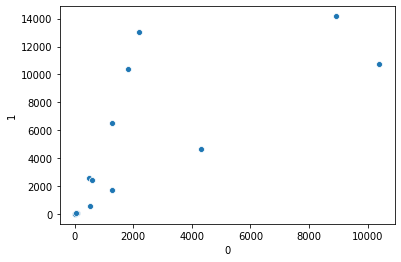

In [42]:
sns.scatterplot(x = centers[0], y = centers[1], data=centers)

In [37]:
len(pd.DataFrame(km.cluster_centers_).columns)

17

## labels 
- These are the labels that the Kmeans Algorithim has discovered

In [45]:
labels = km.labels_

In [46]:
labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [47]:
len(labels)

777

In [48]:
len(df)

777

## We can actually use sklearn metrics to comapre
- Normally we will not have these labels to compare but since we do ets check them

In [49]:
from sklearn.metrics import confusion_matrix, classification_report, explained_variance_score

In [52]:
true_labels = pd.get_dummies(df["Private"], drop_first=True)

In [56]:
true_labels = true_labels["Yes"].values

In [57]:
print(confusion_matrix(km.labels_, true_labels))

[[138 531]
 [ 74  34]]


In [58]:
print(classification_report(km.labels_, true_labels))

              precision    recall  f1-score   support

           0       0.65      0.21      0.31       669
           1       0.06      0.31      0.10       108

    accuracy                           0.22       777
   macro avg       0.36      0.26      0.21       777
weighted avg       0.57      0.22      0.28       777



In [59]:
print(explained_variance_score(km.labels_, true_labels))

-2.615623096938492
